# 一、 使用PyTorch构建LeNet模型

In [1]:
# 构建网络层 --> LeNet
import torch.nn as nn
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) # 1:灰度图片的通道， 6: 输出通道， 5：kernel
        self.conv2 = nn.Conv2d(6, 16, 3) # 6:输入通道， 16：输出通道， 3：kernel
        self.fc1 = nn.Linear(16*5*5, 120) # 16*5*5:输入通道， 120：输出通道
        self.fc2 = nn.Linear(120, 84) # 120：输入通道， 84：输出通道
        self.fc3 = nn.Linear(84, 10) # 输入84，输出10
        
        
    def forward(self, x):
        input_size = x.size(0) # batch_size
        x = self.conv1(x) # 输入：batch*1*28*28, 输出：batch*6*24*24 (28 -5 +1 = 24)
        x = F.leaky_relu(x,negative_slope=0.1) # 激活函数
        x = F.max_pool2d(x, 2, 2) # 输入：batch*6*24*24, 输出：batch*6*12*12
        
        x = self.conv2(x) # 输入：batch*6*12*12, 输出batch*16*10*10 (12 -3 +1 = 10)
        x = F.leaky_relu(x, negative_slope=0.1) # 激活函数
        x = F.max_pool2d(x, 2, 2) # 输入batch*16*10*10, 输出batch*16*5*5
        
        x = x.view(input_size, -1) # 拉平(一列)
#         print("data shape",len(x),x.size(), x)
        
        x = self.fc1(x) # 输入：batch*16*6*5, 输出：batch*120
        x = F.leaky_relu(x,negative_slope=0.1) #保持shape不变
        
        x = self.fc2(x) # 输入：batch*120, 输出：batch*84
        x = F.relu(x) # 保持不变
        
        output = self.fc3(x) #输入：batch*84, 输出：batch*10
        
        #output = F.log_softmax(x, dim=1) # 计算分类后，每个数字的概率值
        
        return output

In [2]:
print(LeNet())

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


# 二、自定义方法(1、读取数据集2、划分批次3、显示图片4、数据预处理)并验证

In [3]:
# 导入模块
import numpy as np
import gzip
import os
import matplotlib.pyplot as plt

In [4]:
# 1、定义读取压缩文件数据的函数
def decompression_function(data_folder, data_name, label_name):
    with gzip.open(os.path.join(data_folder,label_name), 'rb') as lbpath: # rb表示的是读取二进制数据
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(os.path.join(data_folder,data_name), 'rb') as imgpath:
        x_train = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)
    return x_train, y_train


file_path = './data/MNIST/raw'

train_image_gz_path = "train-images-idx3-ubyte.gz"
train_label_gz_path = "train-labels-idx1-ubyte.gz"
train_image, train_label = decompression_function(file_path, train_image_gz_path, train_label_gz_path)
print("训练集：\n", "图片：", len(train_image), "标签：", len(train_label))

val_image_gz_path = "t10k-images-idx3-ubyte.gz"
val_label_gz_path = "t10k-labels-idx1-ubyte.gz"
val_image, val_label = decompression_function(file_path, val_image_gz_path, val_label_gz_path)
print("验证集：\n", "图片：", len(val_image), "标签：", len(val_label))


训练集：
 图片： 60000 标签： 60000
验证集：
 图片： 10000 标签： 10000


In [5]:
# 2、定义划分批次的函数
def batch_split(data, label, batch_size):
    samples = data.shape[0]
    #print(data.shape,samples)
    data_list, label_list = [], []
    times = samples // batch_size if samples % batch_size == 0 else samples // batch_size + 1
    # times = samples //batch
    for i in range(times):
        start = i * batch_size
        end = start + batch_size
        batch_data = data[start:end,: , :]
        batch_label = label[start:end]
        data_list.append(batch_data)
        label_list.append(batch_label)
        #print(i,":",start,end)
        #print(data[start:end,:]
    return data_list, label_list
    

#划分每一批次，批次大小为 64
# 训练集
train_data,train_labels = batch_split(train_image, train_label, 64)
# 验证集
val_data,val_labels = batch_split(val_image, val_label, 64)
# 打印
print("data:\n",train_data,"\n","label:\n",train_labels)
print("data:\n",val_data,"\n","label:\n",val_labels)

data:
 [array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 

In [6]:
# 查看批次划分是否正确
# 训练集
d_train = 0
l_train = 0
t_train = len(train_data)
for i in range(len(train_data)):
    d_train += len(train_data[i])
    l_train += len(train_labels[i])
    print(i,"数据：",len(train_data[i]),"标签：",len(train_labels[i]))

print("训练集总共有{}批次数据，data一共{}条，label一共{}条".format(t_train,d_train,l_train))
print(f"{t_train} * {64} = {t_train * 64}")

# 验证集
d_val = 0
l_val = 0
t_val = len(val_data)
for i in range(len(val_data)):
    d_val += len(val_data[i])
    l_val += len(val_labels[i])
    print(i,"数据：",len(val_data[i]),"标签：",len(val_labels[i]))

print("验证集总共有{}批次数据，data一共{}条，label一共{}条".format(t_val,d_val,l_val))
print(f"{t_val} * {64} = {t_val * 64}")

0 数据： 64 标签： 64
1 数据： 64 标签： 64
2 数据： 64 标签： 64
3 数据： 64 标签： 64
4 数据： 64 标签： 64
5 数据： 64 标签： 64
6 数据： 64 标签： 64
7 数据： 64 标签： 64
8 数据： 64 标签： 64
9 数据： 64 标签： 64
10 数据： 64 标签： 64
11 数据： 64 标签： 64
12 数据： 64 标签： 64
13 数据： 64 标签： 64
14 数据： 64 标签： 64
15 数据： 64 标签： 64
16 数据： 64 标签： 64
17 数据： 64 标签： 64
18 数据： 64 标签： 64
19 数据： 64 标签： 64
20 数据： 64 标签： 64
21 数据： 64 标签： 64
22 数据： 64 标签： 64
23 数据： 64 标签： 64
24 数据： 64 标签： 64
25 数据： 64 标签： 64
26 数据： 64 标签： 64
27 数据： 64 标签： 64
28 数据： 64 标签： 64
29 数据： 64 标签： 64
30 数据： 64 标签： 64
31 数据： 64 标签： 64
32 数据： 64 标签： 64
33 数据： 64 标签： 64
34 数据： 64 标签： 64
35 数据： 64 标签： 64
36 数据： 64 标签： 64
37 数据： 64 标签： 64
38 数据： 64 标签： 64
39 数据： 64 标签： 64
40 数据： 64 标签： 64
41 数据： 64 标签： 64
42 数据： 64 标签： 64
43 数据： 64 标签： 64
44 数据： 64 标签： 64
45 数据： 64 标签： 64
46 数据： 64 标签： 64
47 数据： 64 标签： 64
48 数据： 64 标签： 64
49 数据： 64 标签： 64
50 数据： 64 标签： 64
51 数据： 64 标签： 64
52 数据： 64 标签： 64
53 数据： 64 标签： 64
54 数据： 64 标签： 64
55 数据： 64 标签： 64
56 数据： 64 标签： 64
57 数据： 64 标签： 64
58 数据： 64 标签： 64
59 数据： 

787 数据： 64 标签： 64
788 数据： 64 标签： 64
789 数据： 64 标签： 64
790 数据： 64 标签： 64
791 数据： 64 标签： 64
792 数据： 64 标签： 64
793 数据： 64 标签： 64
794 数据： 64 标签： 64
795 数据： 64 标签： 64
796 数据： 64 标签： 64
797 数据： 64 标签： 64
798 数据： 64 标签： 64
799 数据： 64 标签： 64
800 数据： 64 标签： 64
801 数据： 64 标签： 64
802 数据： 64 标签： 64
803 数据： 64 标签： 64
804 数据： 64 标签： 64
805 数据： 64 标签： 64
806 数据： 64 标签： 64
807 数据： 64 标签： 64
808 数据： 64 标签： 64
809 数据： 64 标签： 64
810 数据： 64 标签： 64
811 数据： 64 标签： 64
812 数据： 64 标签： 64
813 数据： 64 标签： 64
814 数据： 64 标签： 64
815 数据： 64 标签： 64
816 数据： 64 标签： 64
817 数据： 64 标签： 64
818 数据： 64 标签： 64
819 数据： 64 标签： 64
820 数据： 64 标签： 64
821 数据： 64 标签： 64
822 数据： 64 标签： 64
823 数据： 64 标签： 64
824 数据： 64 标签： 64
825 数据： 64 标签： 64
826 数据： 64 标签： 64
827 数据： 64 标签： 64
828 数据： 64 标签： 64
829 数据： 64 标签： 64
830 数据： 64 标签： 64
831 数据： 64 标签： 64
832 数据： 64 标签： 64
833 数据： 64 标签： 64
834 数据： 64 标签： 64
835 数据： 64 标签： 64
836 数据： 64 标签： 64
837 数据： 64 标签： 64
838 数据： 64 标签： 64
839 数据： 64 标签： 64
840 数据： 64 标签： 64
841 数据： 64 标签： 64
842 数据： 64

In [7]:
#3、显示第一批的每张图片
def img_show(x,y,suptitle):
    first_batch_image = x[0]
    first_batch_label = y[0]
    for i in range(len(first_batch_image)):
        img = first_batch_image[i]
        plt.subplot(8,8,i+1)
        plt.imshow(img)
        plt.title(str(first_batch_label[i]))
        plt.axis("off")

    plt.suptitle(suptitle, y=1.7,fontsize = 30)
    plt.subplots_adjust(top=1.5)
    plt.show()

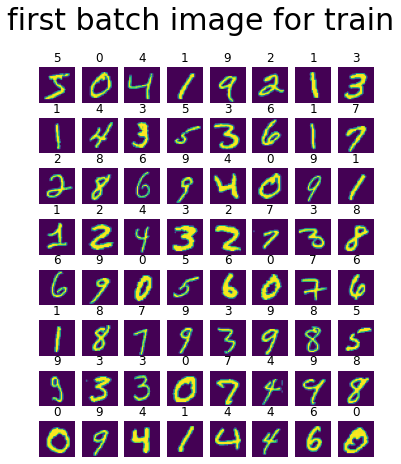

In [8]:
# 显示第一批训练集的每张图片
suptitle = "first batch image for train"
img_show(train_data,train_labels,suptitle)

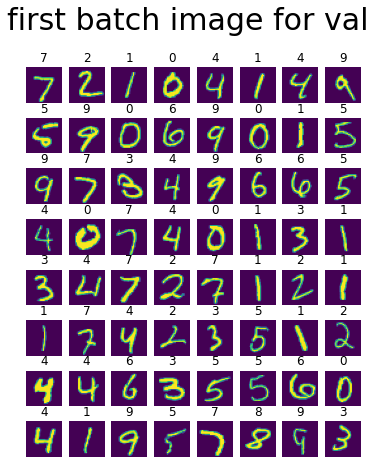

In [9]:
#显示第一批次验证集的每张图片
suptitle = "first batch image for val"
img_show(val_data,val_labels,suptitle)

In [10]:
# 4、数据预处理 --> 1、批量标准化处理 2、转为tensor 格式 3、shape 改为 [x,1,28,28]
import torch
def data_process(batch_data):
    result_batch = 0.0
    if len(batch_data.shape) > 1:    # 判断输入是 data 还是 label
        # data
        batch_all_data = []
        for i in batch_data:
            for k in i:
                for j in k:
                    batch_all_data.append(j)

        batch_mean = np.array(batch_all_data).mean()
        batch_std = np.array(batch_all_data).std()
        # 批量标准化处理
        batch_Normalize = (batch_data-batch_mean) / batch_std
        # 转为tensor格式
        batch_to_tensor = torch.from_numpy(batch_Normalize).type(torch.float32)
        # shape 改为 [x,1,28,28]
        result_batch = torch.unsqueeze(batch_to_tensor,dim=1)
    
    
    else:
        # label
        result_batch = torch.from_numpy(batch_data)

        
    
    return result_batch
   

In [11]:
data_process(train_data[-1]).shape,data_process(train_labels[-1]).shape

<ipython-input-10-74fec72cfa7c>:25: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_numpy.cpp:178.)
  result_batch = torch.from_numpy(batch_data)


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

# 三、自定义对比损失函数-->CrossEntropy()

In [12]:
# 定义损失函数-->CrossEntropyLoss()
import torch.nn.functional as F
def crossentropyloss(predict, y):
    # log_softmax
    softmax_x = F.softmax(predict, dim=1)
    log_softmax_x = torch.log(softmax_x)
    # nllloss
    batch_loss = F.nll_loss(log_softmax_x,y,reduction="mean")
    
    return batch_loss

# 四、TSNE可视化

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


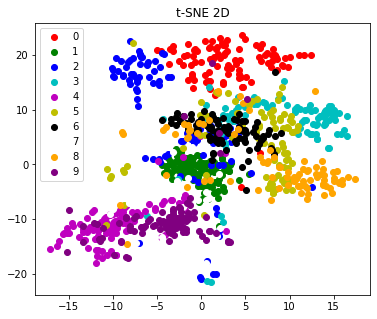

In [13]:
# 2d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.manifold import TSNE


X = np.reshape(train_image,(60000,784))[:1000,:]
y = train_label[:1000]
  
tsne = TSNE(n_components=3, random_state=0)

X_2d = tsne.fit_transform(X) 
 
target_ids = range(len(X))
 
                   
plt.figure(figsize=(6, 5))
 
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
 
for i, c, label in zip(target_ids, colors, np.unique(y)):
 
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
    
plt.title("t-SNE 2D")    
plt.legend()
plt.show()

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


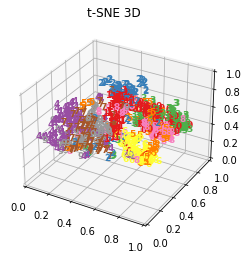

In [14]:
# 3d
X_3d = tsne.fit_transform(X)
def plot_embedding_3d(X, title=None):
    #坐标缩放到[0,1]区间
    x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
    X = (X - x_min) / (x_max - x_min)
    #降维后的坐标为（X[i, 0], X[i, 1],X[i,2]），在该位置画出对应的digits
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1], X[i,2],str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    if title is not None:
        plt.title(title)

plot_embedding_3d(X_3d,"t-SNE 3D " )

# 五、定义超参数，训练模型

In [15]:
#定义超参数
import torch.optim as optim
epochs = 15 #训练数据集的轮次
#batch_size = 64 #每批处理的数据
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = LeNet().to(device)
optimizer = optim.Adam(model.parameters())

cuda


In [16]:
# 训练模型
def train_val(model,x_train,y_train,x_val,y_val,epochs):
    val_accuracy = [] #储存每一轮验证集准确率
    train_batch_loss = [] #储存每一批次训练集loss
    val_batch_loss = [] #储存每一批次验证集loss
    for epoch in range(epochs):
        model.train()
        for batch_t in range(len(x_train)):
            # data_process() 数据预处理 --> 1、批量标准化处理 2、转为tensor 格式 3、shape 改为 [64,1,28,28]
            data_t = data_process(x_train[batch_t])
            traget_t = data_process(y_train[batch_t])
            #部署到DEVICE上去
            data_t, traget_t = data_t.to(device), traget_t.to(device)
    #         print("数据尺寸:",data_t.shape)
    #         print("标签尺寸:",traget_t.shape)
    #         # 梯度初始化为0
            optimizer.zero_grad()
    #         # 训练后的结果
            output = model(data_t)
    #         print("输出尺寸",output.shape)
    #         # 计算损失
            loss = F.cross_entropy(output, traget_t)
            myloss = crossentropyloss(output, traget_t) #自定义损失函数
            train_batch_loss.append(myloss.item())
    #         print("损失：",loss)
    #         #反向传播
            loss.backward()
    #         # 参数优化
            optimizer.step()
    #         print(batch_t,batch_t % 3000 == 0)
            if batch_t % 100 == 0:
                print("Train Epoch : {} \t batch_index : {} \t authority_loss : {:.6f} \t my_Loss : {:.6f}".format(epoch+1,
                                                                                                                   batch_t,
                                                                                                                   loss.item(),
                                                                                                                  myloss.item()))

             #模型验证
        model.eval()
        #正确率
        correct = 0.0
        #测试损失
        test_loss = 0.0
        mytest_loss = 0.0
        len_batch = 0
        with torch.no_grad(): # 不会计算梯度，也不会进行反向传播
            for batch_v in range(len(x_val)):
                len_batch += len(x_val[batch_v])   #计算验证集数据总条数
                data_v = data_process(x_val[batch_v])
                target_v = data_process(y_val[batch_v])
                # 部署到device上
                data_v, target_v = data_v.to(device), target_v.to(device)
                # 测试数据
                output = model(data_v)
                # 计算测试损失
                val_loss = crossentropyloss(output, target_v).item()  #自定义损失函数
                val_batch_loss.append(val_loss)
                test_loss += F.cross_entropy(output, target_v).item()
                mytest_loss += val_loss
                # 找到概率值最大的下标
                pred = output.max(1, keepdim=True)[1] # 返回 (值， 索引)
                #pred = torch.max(output, dim=1)
                #pred = output.argmax(dim=1)
                # 累计正确的值
                correct += pred.eq(target_v.view_as(pred)).sum().item()
            test_loss /= len_batch
            mytest_loss /= len_batch
            accuracy = correct / len_batch
            val_accuracy.append(accuracy)
            print("Test -- authorityAverage loss : {:.4f}, myAverage loss : {:.4f}, Accuracy : {:.3f}\n".format(
            test_loss,mytest_loss,accuracy))
            
            
    return np.array(val_accuracy),train_batch_loss,val_batch_loss

In [17]:
val_eopch_accuracy, train_batch_loss, val_batch_loss = train_val(model,train_data,train_labels,val_data,val_labels,epochs)

Train Epoch : 1 	 batch_index : 0 	 authority_loss : 2.305246 	 my_Loss : 2.305247
Train Epoch : 1 	 batch_index : 100 	 authority_loss : 0.310374 	 my_Loss : 0.310374
Train Epoch : 1 	 batch_index : 200 	 authority_loss : 0.178810 	 my_Loss : 0.178810
Train Epoch : 1 	 batch_index : 300 	 authority_loss : 0.270584 	 my_Loss : 0.270584
Train Epoch : 1 	 batch_index : 400 	 authority_loss : 0.067000 	 my_Loss : 0.067000
Train Epoch : 1 	 batch_index : 500 	 authority_loss : 0.163410 	 my_Loss : 0.163410
Train Epoch : 1 	 batch_index : 600 	 authority_loss : 0.087972 	 my_Loss : 0.087972
Train Epoch : 1 	 batch_index : 700 	 authority_loss : 0.206692 	 my_Loss : 0.206692
Train Epoch : 1 	 batch_index : 800 	 authority_loss : 0.392768 	 my_Loss : 0.392768
Train Epoch : 1 	 batch_index : 900 	 authority_loss : 0.145487 	 my_Loss : 0.145487
Test -- authorityAverage loss : 0.0014, myAverage loss : 0.0014, Accuracy : 0.972

Train Epoch : 2 	 batch_index : 0 	 authority_loss : 0.037900 	 my_Lo

Train Epoch : 9 	 batch_index : 900 	 authority_loss : 0.003679 	 my_Loss : 0.003679
Test -- authorityAverage loss : 0.0009, myAverage loss : 0.0009, Accuracy : 0.988

Train Epoch : 10 	 batch_index : 0 	 authority_loss : 0.042169 	 my_Loss : 0.042169
Train Epoch : 10 	 batch_index : 100 	 authority_loss : 0.000484 	 my_Loss : 0.000484
Train Epoch : 10 	 batch_index : 200 	 authority_loss : 0.031254 	 my_Loss : 0.031254
Train Epoch : 10 	 batch_index : 300 	 authority_loss : 0.058661 	 my_Loss : 0.058661
Train Epoch : 10 	 batch_index : 400 	 authority_loss : 0.003813 	 my_Loss : 0.003813
Train Epoch : 10 	 batch_index : 500 	 authority_loss : 0.007753 	 my_Loss : 0.007753
Train Epoch : 10 	 batch_index : 600 	 authority_loss : 0.056461 	 my_Loss : 0.056461
Train Epoch : 10 	 batch_index : 700 	 authority_loss : 0.046790 	 my_Loss : 0.046790
Train Epoch : 10 	 batch_index : 800 	 authority_loss : 0.142327 	 my_Loss : 0.142327
Train Epoch : 10 	 batch_index : 900 	 authority_loss : 0.01

In [23]:
# 查看结果：
print("全部准确率：",val_eopch_accuracy)
print("最大准确率：",val_eopch_accuracy.max())
print("最小准确率：",val_eopch_accuracy.min())
print("平均准确率：",val_eopch_accuracy.mean())

全部准确率： [0.9718 0.9823 0.9883 0.9872 0.9873 0.9886 0.9878 0.9874 0.9878 0.9881
 0.9883 0.989  0.9899 0.9897 0.9887]
最大准确率： 0.9899
最小准确率： 0.9718
平均准确率： 0.9868133333333334


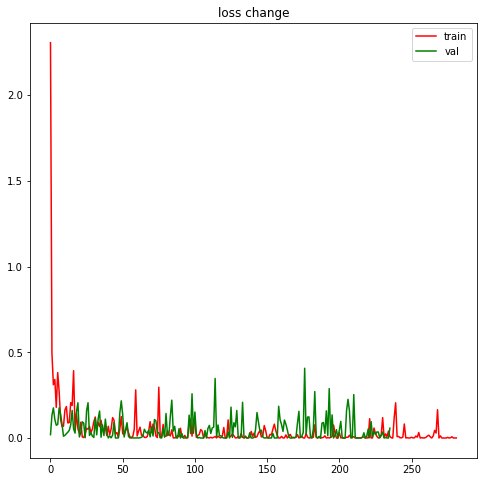

In [19]:
plt.figure(figsize=(8,8))
x_t = range(len(train_batch_loss[::50]))
y_t = train_batch_loss[::50]

x_v = range(len(val_batch_loss[::10]))
y_v = val_batch_loss[::10]
plt.plot(x_t,y_t,c="r",label="train")
plt.plot(x_v,y_v,c="g",label="val")
plt.title("loss change")
plt.legend()
plt.show()

In [20]:
print(torch.cuda.device_count())

1


In [21]:
print(torch.cuda.get_device_name(0))

NVIDIA GeForce MX250


In [22]:
print(torch.cuda.is_available())

True
